In [15]:
import zipfile
with zipfile.ZipFile('ml-latest-small.zip', 'r') as zip_ref:
    zip_ref.extractall('movies_ratings_db/')



In [18]:
import pandas as pd
movies=pd.read_csv('movies_ratings_db/ml-latest-small/movies.csv', engine='python')
ratings=pd.read_csv('movies_ratings_db/ml-latest-small/ratings.csv', engine='python')


In [24]:
print(movies.head(10))

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Adventure|Children  
8       

In [25]:
print(ratings.head(10))

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
5       1       70     3.0  964982400
6       1      101     5.0  964980868
7       1      110     4.0  964982176
8       1      151     5.0  964984041
9       1      157     5.0  964984100


In [33]:
movie_id=movies.movieId
title=movies.title
genres=movies.genres
user_id=ratings.userId
ratings_mid=ratings.movieId  #movieId column of 'ratings' file
rating=ratings.rating  #rating column of 'ratings' file


In [37]:
print(genres[0])

Adventure|Animation|Children|Comedy|Fantasy


In [42]:
genres_z=genres[0]
genres_zsplit=genres_z.split('|')
print(genres_zsplit)
print(type(genres_zsplit))

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']
<class 'list'>


In [72]:
genres_all=[]
for n in range(len(genres)):
    genre_line=str(genres[n])
    gl_split=genre_line.split('|')
    for i in range(len(gl_split)):
        if gl_split[i] not in genres_all: genres_all.append(gl_split[i]) 

print(genres_all)   

print('\n There are ', len(genres_all), ' genres in the database')


['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']

 There are  20  genres in the database


2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE:  0.8650238971125143
Minimum average MAE:  0.6642263875619782


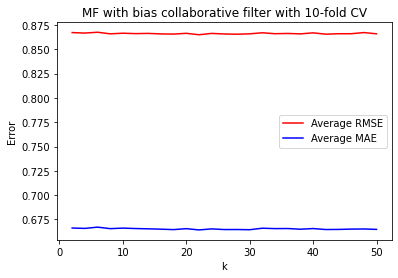

In [88]:
#Q24
'''Design a MF with bias collaborative filter to predict the ratings of the movies
in the MovieLens dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k
(number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average
RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the
average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For
solving this question, use the default value for the regularization parameter.'''


import numpy as np
import matplotlib.pyplot as plt
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise import Dataset, Reader

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1, rating_scale=(0.5, 5))
file_path = "/Users/ohass/UCLAMSDS/ECE219/Project 3/movies_ratings_db/ml-latest-small/ratings.csv"
data = Dataset.load_from_file(file_path, reader=reader)

avg_rmse = []
avg_mae = []
k = np.linspace(2,50,num=25,dtype=int)
for i in k:
    print(i)
    perf = cross_validate(SVD(n_factors=i,verbose=False),data,cv=10)
    avg_rmse.append(np.mean(perf['test_rmse']))
    avg_mae.append(np.mean(perf['test_mae']))

print("Minimum average RMSE: ", min(avg_rmse))
print("Minimum average MAE: ", min(avg_mae))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.plot(k, avg_mae, 'b', label='Average MAE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("MF with bias collaborative filter with 10-fold CV")
plt.show()

In [76]:
k = np.linspace(2,50,num=25,dtype=int)
print(k)

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50]


Minimum average RMSE:  0.8650238971125143
Minimum average MAE:  0.6642263875619782


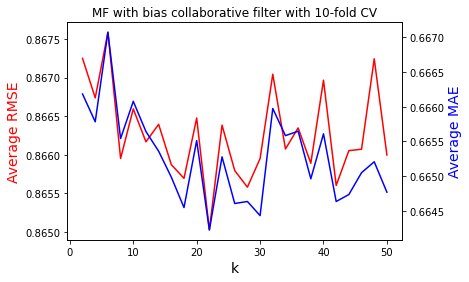

In [121]:
print("Minimum average RMSE: ", min(avg_rmse))
print("Minimum average MAE: ", min(avg_mae))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
#ax.plot(k, avg_mae, 'b', label='Average MAE')
ax.set_ylabel("Average RMSE",color="red",fontsize=14)
ax.set_xlabel("k",fontsize=14)

ax2=ax.twinx()
ax2.plot(k, avg_mae, 'b', label='Average MAE')
ax2.set_ylabel("Average MAE",color="blue",fontsize=14)

plt.title("MF with bias collaborative filter with 10-fold CV")
plt.show()




<Figure size 432x288 with 0 Axes>

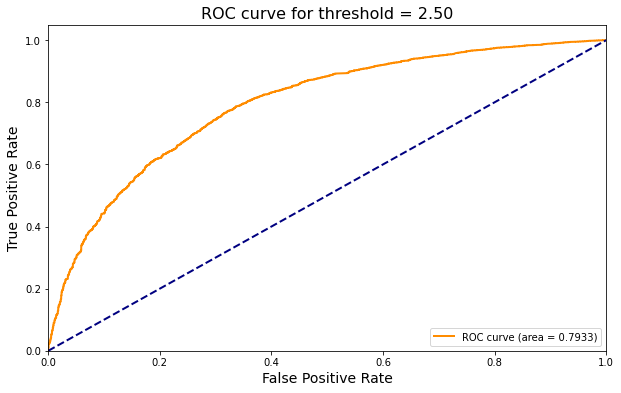

In [126]:
#Q29
''' Plot the ROC curves for the MF with bias collaborative filter designed in question
24 for threshold values [2.5, 3, 3.5, 4]. For the ROC plotting use the optimal number of latent factors
found in question 25. For each of the plots, also report the area under the curve (AUC) value.
'''
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

trainset, testset = train_test_split(data, test_size=.1)
pred = SVD(n_factors=22,verbose=False).fit(trainset).test(testset)
y_true = []
thresh = 2.5
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14); plt.ylabel('True Positive Rate', fontsize=14);
plt.title('ROC curve for threshold = %0.2f' % thresh, fontsize=16);plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

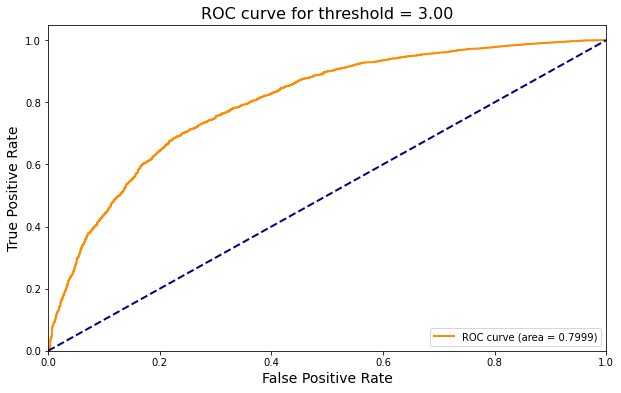

In [127]:
trainset, testset = train_test_split(data, test_size=.1)
pred = SVD(n_factors=22,verbose=False).fit(trainset).test(testset)
y_true = []
thresh = 3
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14); plt.ylabel('True Positive Rate', fontsize=14);
plt.title('ROC curve for threshold = %0.2f' % thresh, fontsize=16);plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

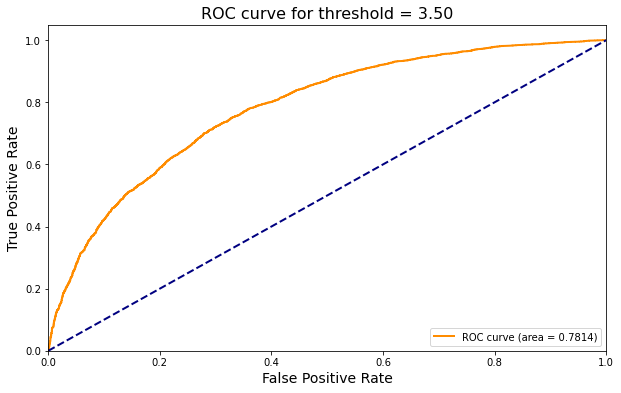

In [128]:
trainset, testset = train_test_split(data, test_size=.1)
pred = SVD(n_factors=22,verbose=False).fit(trainset).test(testset)
y_true = []
thresh = 3.5
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14); plt.ylabel('True Positive Rate', fontsize=14);
plt.title('ROC curve for threshold = %0.2f' % thresh, fontsize=16);plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

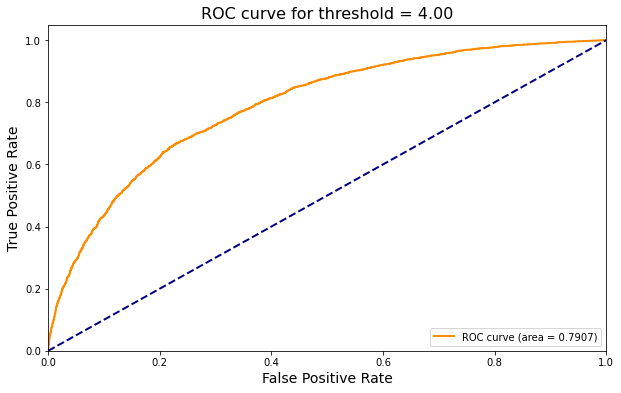

In [129]:
trainset, testset = train_test_split(data, test_size=.1)
pred = SVD(n_factors=22,verbose=False).fit(trainset).test(testset)
y_true = []
thresh = 4
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14); plt.ylabel('True Positive Rate', fontsize=14);
plt.title('ROC curve for threshold = %0.2f' % thresh, fontsize=16);plt.legend(loc="lower right")
plt.show()

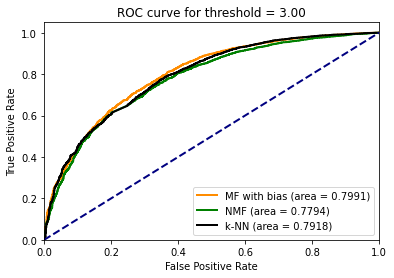

In [138]:
#Q34
''' Plot the ROC curves (threshold = 3) for the k-NN, NNMF, and MF with bias
based collaborative filters in the same figure. Use the figure to compare the performance of the
filters in predicting the ratings of the movies.
'''
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.prediction_algorithms.knns import KNNWithMeans


trainset, testset = train_test_split(data, test_size=.1)

pred = SVD(n_factors=22,verbose=False).fit(trainset).test(testset)
y_true = []
thresh = 3
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
lw = 2; plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='MF with bias (area = %0.4f)' % roc_auc)

pred = NMF(n_factors=18,verbose=False).fit(trainset).test(testset)
y_true = []
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color='green',lw=lw, label='NMF (area = %0.4f)' % roc_auc)

pred = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)
y_true = []
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color='black',lw=lw, label='k-NN (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
plt.title('ROC curve for threshold = %0.2f' % thresh);plt.legend(loc="lower right")
plt.show()